In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

# --------------------------------------------------------------------
# 📂 공용 라이브러리 로드 (Load Shared Library)
# --------------------------------------------------------------------
try:
    sys.path.append(os.path.abspath('../../01_Shared_Lib'))
    import constants as config
    import barh_plot as hbar
    print(f'📚 Shared Library Loaded: {config.__name__}')
except ImportError:
    print('⚠️ constants.py를 찾을 수 없습니다. (경로 확인 필요)')

# --------------------------------------------------------------------
# 🎨 한글 폰트 및 시각화 설정 (Korean Font & Visualization Settings)
# --------------------------------------------------------------------
if os.name == 'nt': # Windows
    plt.rc('font', family='Malgun Gothic')
elif os.name == 'posix': # Mac
    plt.rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지
plt.rcParams['figure.figsize'] = (10, 6)   # 기본 도화지 크기 설정

print('✅ Data Analysis Environment Initialized!')

📚 Shared Library Loaded: constants
✅ Data Analysis Environment Initialized!


In [4]:
file_path = '../../00_Common_Data/Master_Sales_2025_Total.parquet'
df = pd.read_parquet(file_path)

df['ta_ymd'] = pd.to_datetime(df['ta_ymd'], format='%Y%m%d')

df['hour'] = df['hour'].map(config.TIME_SHORT_MAP)
df['age'] = df['age'].map(config.AGE_MAP)

target_cols = ['cty_rgn_no', 'admi_cty_no', 'card_tpbuz_cd', 'card_tpbuz_nm_1', 'card_tpbuz_nm_2', 'sex', 'day', 'age', 'hour']
for col in target_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')

df.info()

print('✅ Data Settings Environment Initialized!')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5097784 entries, 0 to 5097783
Data columns (total 14 columns):
 #   Column           Dtype         
---  ------           -----         
 0   ta_ymd           datetime64[ns]
 1   cty_rgn_no       category      
 2   admi_cty_no      category      
 3   card_tpbuz_cd    category      
 4   card_tpbuz_nm_1  category      
 5   card_tpbuz_nm_2  category      
 6   hour             category      
 7   sex              category      
 8   age              category      
 9   day              category      
 10  amt              int64         
 11  cnt              int64         
 12  month            int32         
 13  period           object        
dtypes: category(9), datetime64[ns](1), int32(1), int64(2), object(1)
memory usage: 218.8+ MB
✅ Data Settings Environment Initialized!


In [5]:
df

,ta_ymd,cty_rgn_no,admi_cty_no,card_tpbuz_cd,card_tpbuz_nm_1,card_tpbuz_nm_2,hour,sex,age,day,amt,cnt,month,period
0,2025-01-01,41500,41500250,D01,소매/유통,가전제품,13-15시,F,70대,수요일,1923474,2,1,겨울
1,2025-01-01,41500,41500250,D01,소매/유통,가전제품,17-19시,F,40대,수요일,43152,2,1,겨울
2,2025-01-01,41500,41500250,D02,소매/유통,건강/기호식품,11-13시,M,20대,수요일,8400,2,1,겨울
3,2025-01-01,41500,41500250,D02,소매/유통,건강/기호식품,13-15시,F,20대,수요일,68164,2,1,겨울
4,2025-01-01,41500,41500250,D02,소매/유통,건강/기호식품,13-15시,M,30대,수요일,141139,2,1,겨울
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5097779,2025-10-31,41500,41500530,Y03,공공/기업/단체,기업,13-15시,M,60대,금요일,29746,2,10,가을
5097780,2025-10-31,41500,41500530,Y03,공공/기업/단체,기업,15-17시,F,50대,금요일,227280,3,10,가을
5097781,2025-10-31,41500,41500530,Y03,공공/기업/단체,기업,15-17시,F,60대,금요일,223489,3,10,가을
5097782,2025-10-31,41500,41500530,Y03,공공/기업/단체,기업,15-17시,M,60대,금요일,109421,2,10,가을


In [6]:
food_df = df[df['card_tpbuz_nm_1']=='음식']

#M_20대_한식 / F_40대_양식 등 세그멘테이션
food_df['sex'] = food_df['sex'].astype(str)
food_df['age'] = food_df['age'].astype(str)
food_df['card_tpbuz_nm_2'] = food_df['card_tpbuz_nm_2'].astype(str)

food_df['Persona_ID'] = food_df['sex'] + "_" + food_df['age'] + "_" + food_df['card_tpbuz_nm_2']



C:\Users\owner\AppData\Local\Temp\ipykernel_13904\2458842506.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_df['sex'] = food_df['sex'].astype(str)
C:\Users\owner\AppData\Local\Temp\ipykernel_13904\2458842506.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_df['age'] = food_df['age'].astype(str)
C:\Users\owner\AppData\Local\Temp\ipykernel_13904\2458842506.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [7]:
food_df['First_Order_Date'] = food_df.groupby('Persona_ID')['ta_ymd'].transform('min')

food_df

C:\Users\owner\AppData\Local\Temp\ipykernel_13904\2712191645.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_df['First_Order_Date'] = food_df.groupby('Persona_ID')['ta_ymd'].transform('min')


,ta_ymd,cty_rgn_no,admi_cty_no,card_tpbuz_cd,card_tpbuz_nm_1,card_tpbuz_nm_2,hour,sex,age,day,amt,cnt,month,period,Persona_ID,First_Order_Date
355,2025-01-01,41500,41500250,Q01,음식,간이주점,00-07시,F,20대,수요일,78552,2,1,겨울,F_20대_간이주점,2025-01-01
356,2025-01-01,41500,41500250,Q01,음식,간이주점,00-07시,M,20대,수요일,234802,3,1,겨울,M_20대_간이주점,2025-01-01
357,2025-01-01,41500,41500250,Q01,음식,간이주점,11-13시,F,30대,수요일,44399,2,1,겨울,F_30대_간이주점,2025-01-01
358,2025-01-01,41500,41500250,Q01,음식,간이주점,11-13시,M,60대,수요일,39276,2,1,겨울,M_60대_간이주점,2025-01-01
359,2025-01-01,41500,41500250,Q01,음식,간이주점,13-15시,F,50대,수요일,81318,2,1,겨울,F_50대_간이주점,2025-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5097552,2025-10-31,41500,41500530,Q15,음식,한식,21-23시,M,30대,금요일,159782,2,10,가을,M_30대_한식,2025-01-01
5097553,2025-10-31,41500,41500530,Q15,음식,한식,21-23시,M,40대,금요일,177886,3,10,가을,M_40대_한식,2025-01-01
5097554,2025-10-31,41500,41500530,Q15,음식,한식,21-23시,M,50대,금요일,155215,2,10,가을,M_50대_한식,2025-01-01
5097555,2025-10-31,41500,41500530,Q15,음식,한식,23-24시,F,20대,금요일,26711,2,10,가을,F_20대_한식,2025-01-01


In [8]:
# 피벗 to 표 연습 ( 사람 혹은 고객이 있었더라면 할 수 있었겠지만 아쉬워서 연습으로만 남기고자 함)
#Cohort분석은 월 단위
food_df['First_Order_Date'] = pd.to_datetime(food_df['First_Order_Date'], format="%Y%m%d")

food_df['Order_Month'] = food_df['ta_ymd'].dt.to_period('M')
food_df['First_Order_Month'] = food_df['First_Order_Date'].dt.to_period('M') #dt.month -> 2025-01도 1 / 2026-01도 1

temp = food_df.pivot_table(index='First_Order_Month', columns='Order_Month', values='Persona_ID', aggfunc='nunique')

display(temp)

C:\Users\owner\AppData\Local\Temp\ipykernel_13904\3466547068.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_df['First_Order_Date'] = pd.to_datetime(food_df['First_Order_Date'], format="%Y%m%d")
C:\Users\owner\AppData\Local\Temp\ipykernel_13904\3466547068.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_df['Order_Month'] = food_df['ta_ymd'].dt.to_period('M')
C:\Users\owner\AppData\Local\Temp\ipykernel_13904\3466547068.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

Order_Month,2025-01,2025-02,2025-03,2025-04,2025-05,2025-06,2025-07,2025-08,2025-09,2025-10
First_Order_Month,,,,,,,,,,
2025-01,273.0,268.0,271.0,270.0,268.0,266.0,269.0,270.0,270.0,271.0
2025-02,NaN,4.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0
2025-03,NaN,NaN,2.0,2.0,1.0,1.0,2.0,NaN,1.0,2.0
2025-04,NaN,NaN,NaN,2.0,NaN,NaN,1.0,NaN,1.0,NaN
2025-05,NaN,NaN,NaN,NaN,3.0,NaN,NaN,1.0,1.0,2.0
2025-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


In [9]:
# 분석 목표 수정( 식별자 없음의 한계 ) 

plt.figure(figsize=(20,10))
pivot_df = food_df.pivot_table(index="Persona_ID", columns="Order_Month", values="amt", aggfunc='sum', fill_value=0)

display(pivot_df)

Order_Month,2025-01,2025-02,2025-03,2025-04,2025-05,2025-06,2025-07,2025-08,2025-09,2025-10
Persona_ID,,,,,,,,,,
F_100세 이상_한식,0,0,0,8720,0,0,38368,0,0,0
F_10대_간이주점,1338736,1153127,1194892,399203,530244,247293,1010260,1428683,801941,611850
F_10대_고기요리,854065,1103993,1162514,1731337,2249813,901148,2383230,2080908,1750441,1853514
F_10대_닭/오리요리,542663,673465,1142163,1199939,1723091,539005,1824699,1679383,940736,1329415
F_10대_별식/퓨전요리,809542,725623,1021814,930470,1717777,1121224,3102277,2375809,2684573,2538389
...,...,...,...,...,...,...,...,...,...,...
M_90대_중식,70529,107031,143203,26098,74575,129329,0,0,0,0
M_90대_커피/음료,87478,84677,143770,109802,71741,312437,281756,629681,151905,319149
M_90대_패스트푸드,40824,126074,9230,15801,0,151021,9535,175492,121983,4271


<Figure size 2000x1000 with 0 Axes>

<Axes: >

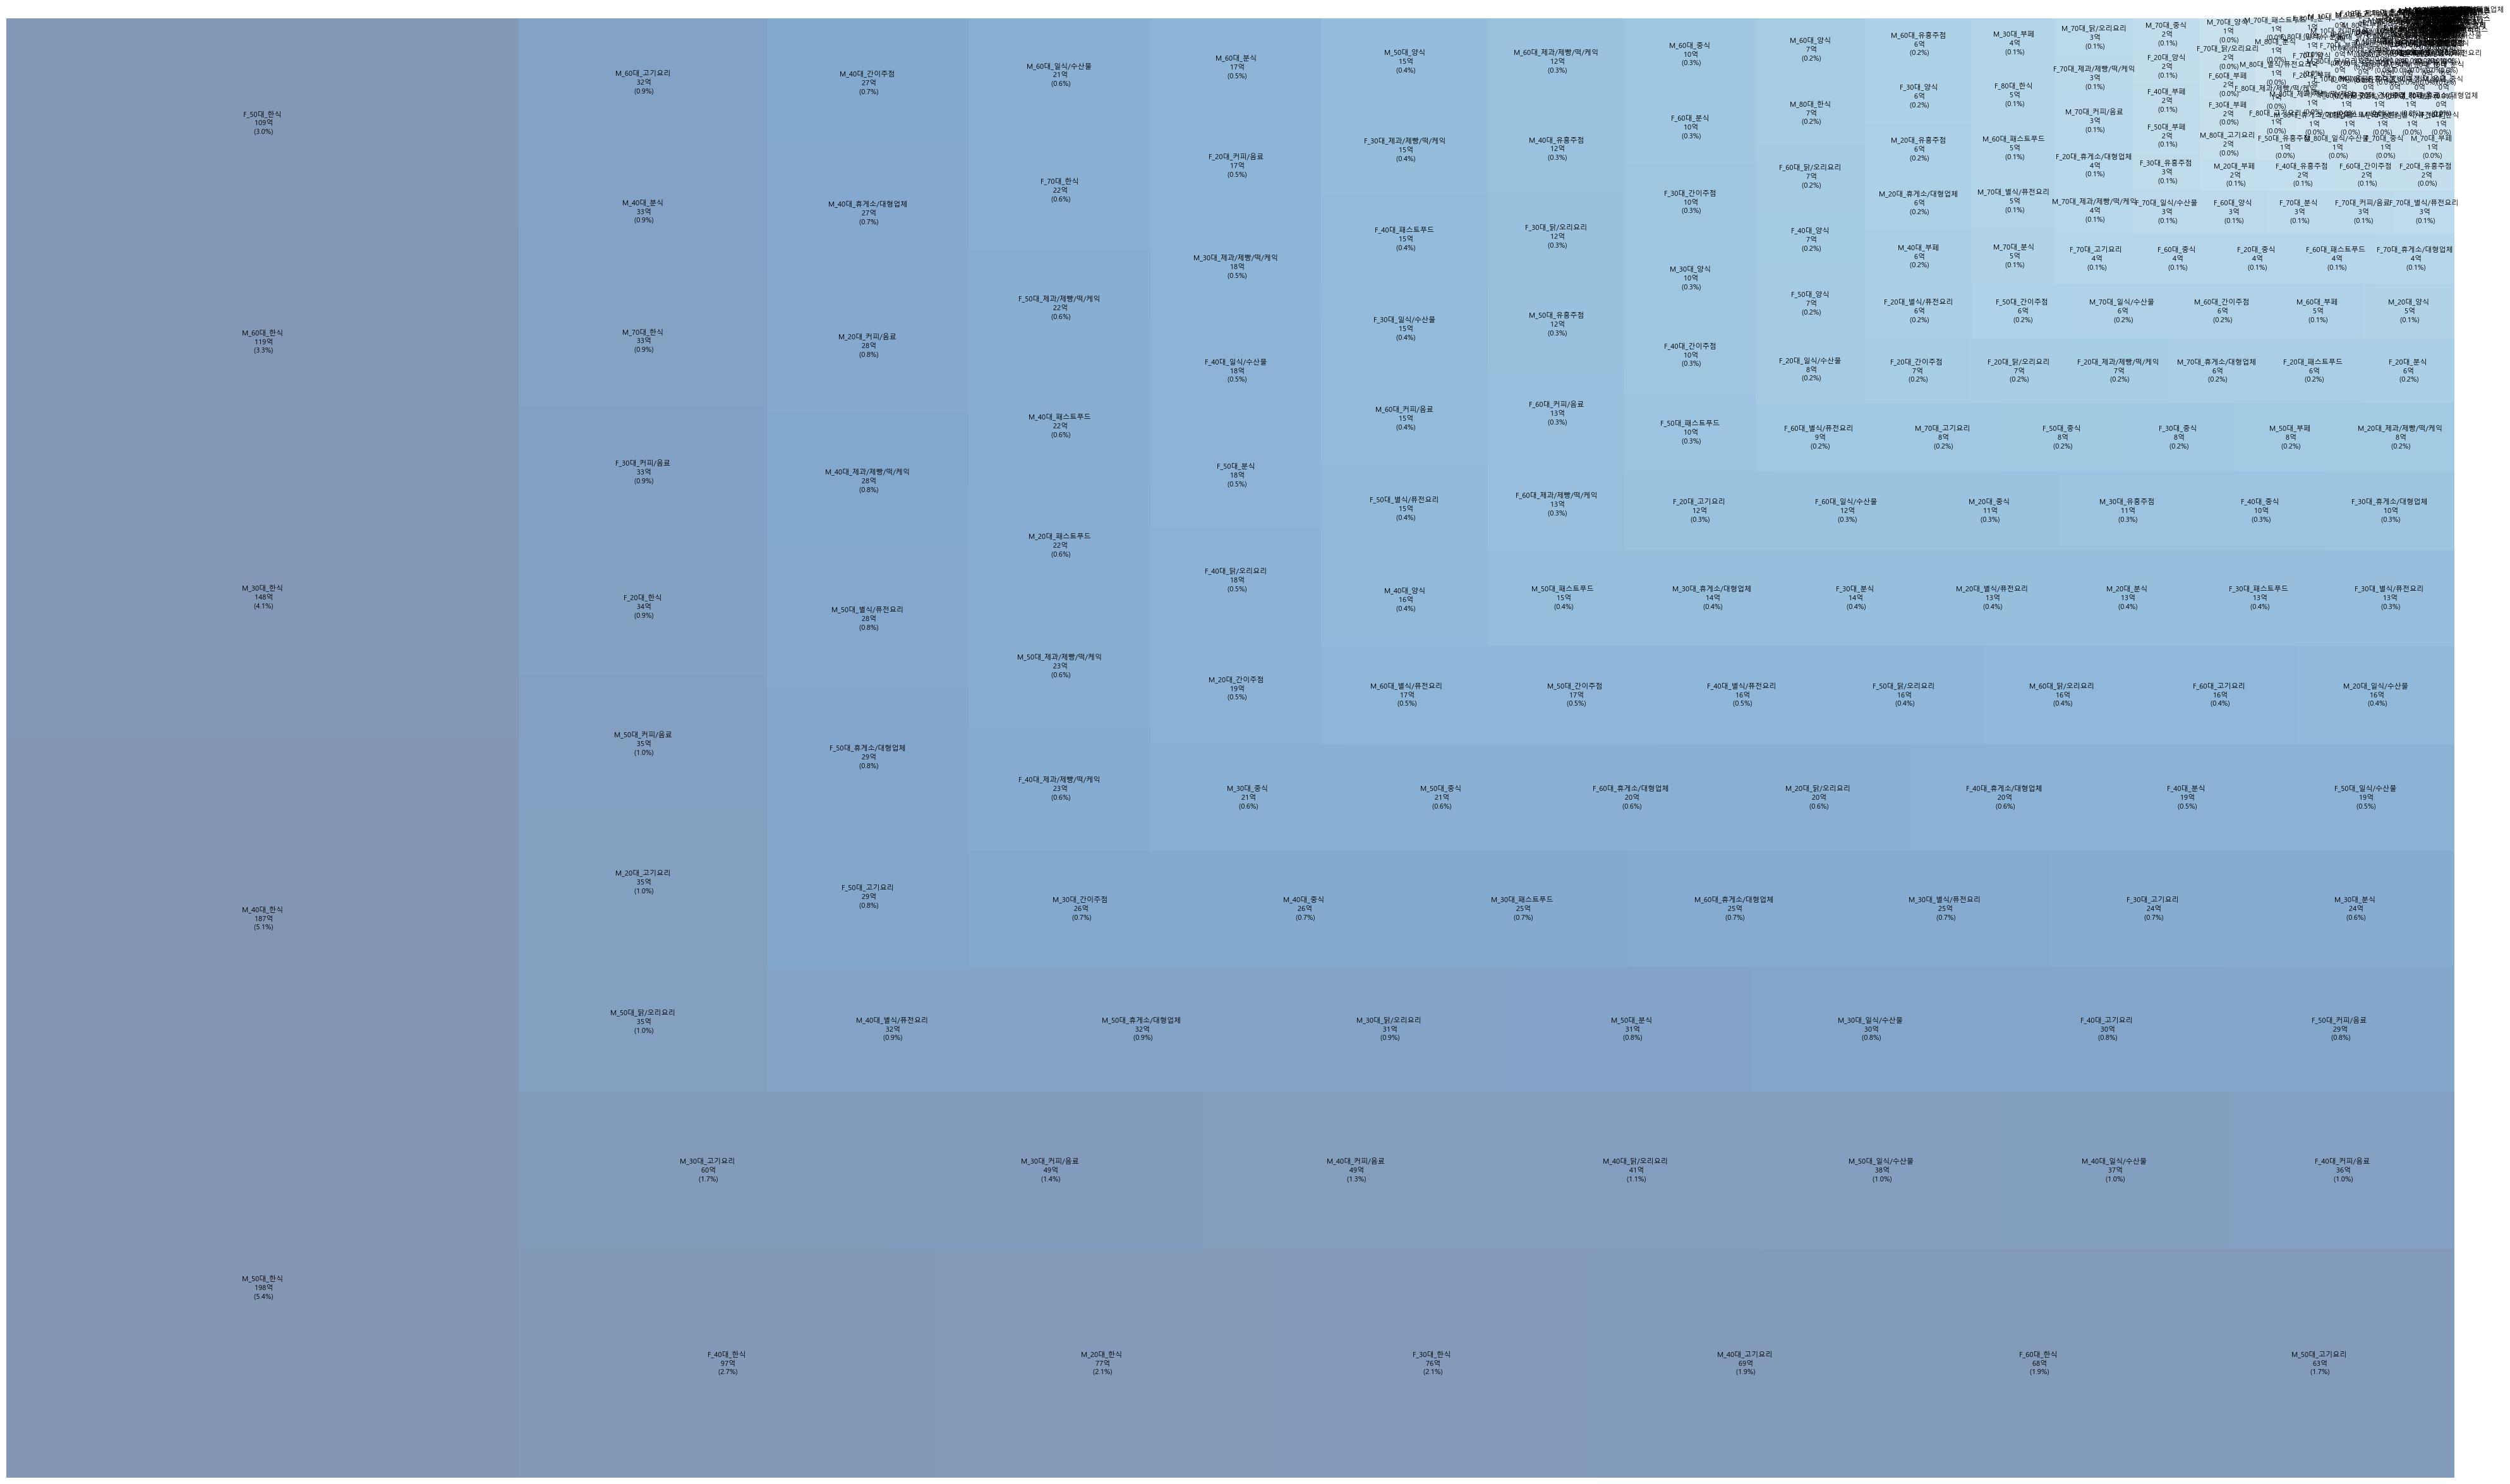

In [ ]:
## 집단 기반 트리맵 제작
import squarify #트리맵 제작 라이브러리

#그룹화
tree_df = food_df.groupby('Persona_ID')['amt'].sum().sort_values(ascending=False)
Total_sum = tree_df.sum()

#도화지 제작
fig, ax = plt.subplots(figsize=(15,8))

#라벨
labels = []

#단위 : 억
for index, value in tree_df.items():
    pct = (value/Total_sum) * 100
    text = f"{index}\n {value/100000000:.0f}억\n ({pct:.1f}%)"
    labels.append(text)

#색
color = sns.color_palette('Blues_r', len(tree_df.index))

#그래프 제거
ax.set_xticks([])
ax.set_yticks([])
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
squarify.plot(sizes=tree_df, label=labels, color=color, alpha=0.5, ax=ax, text_kwargs={'fontsize':8})

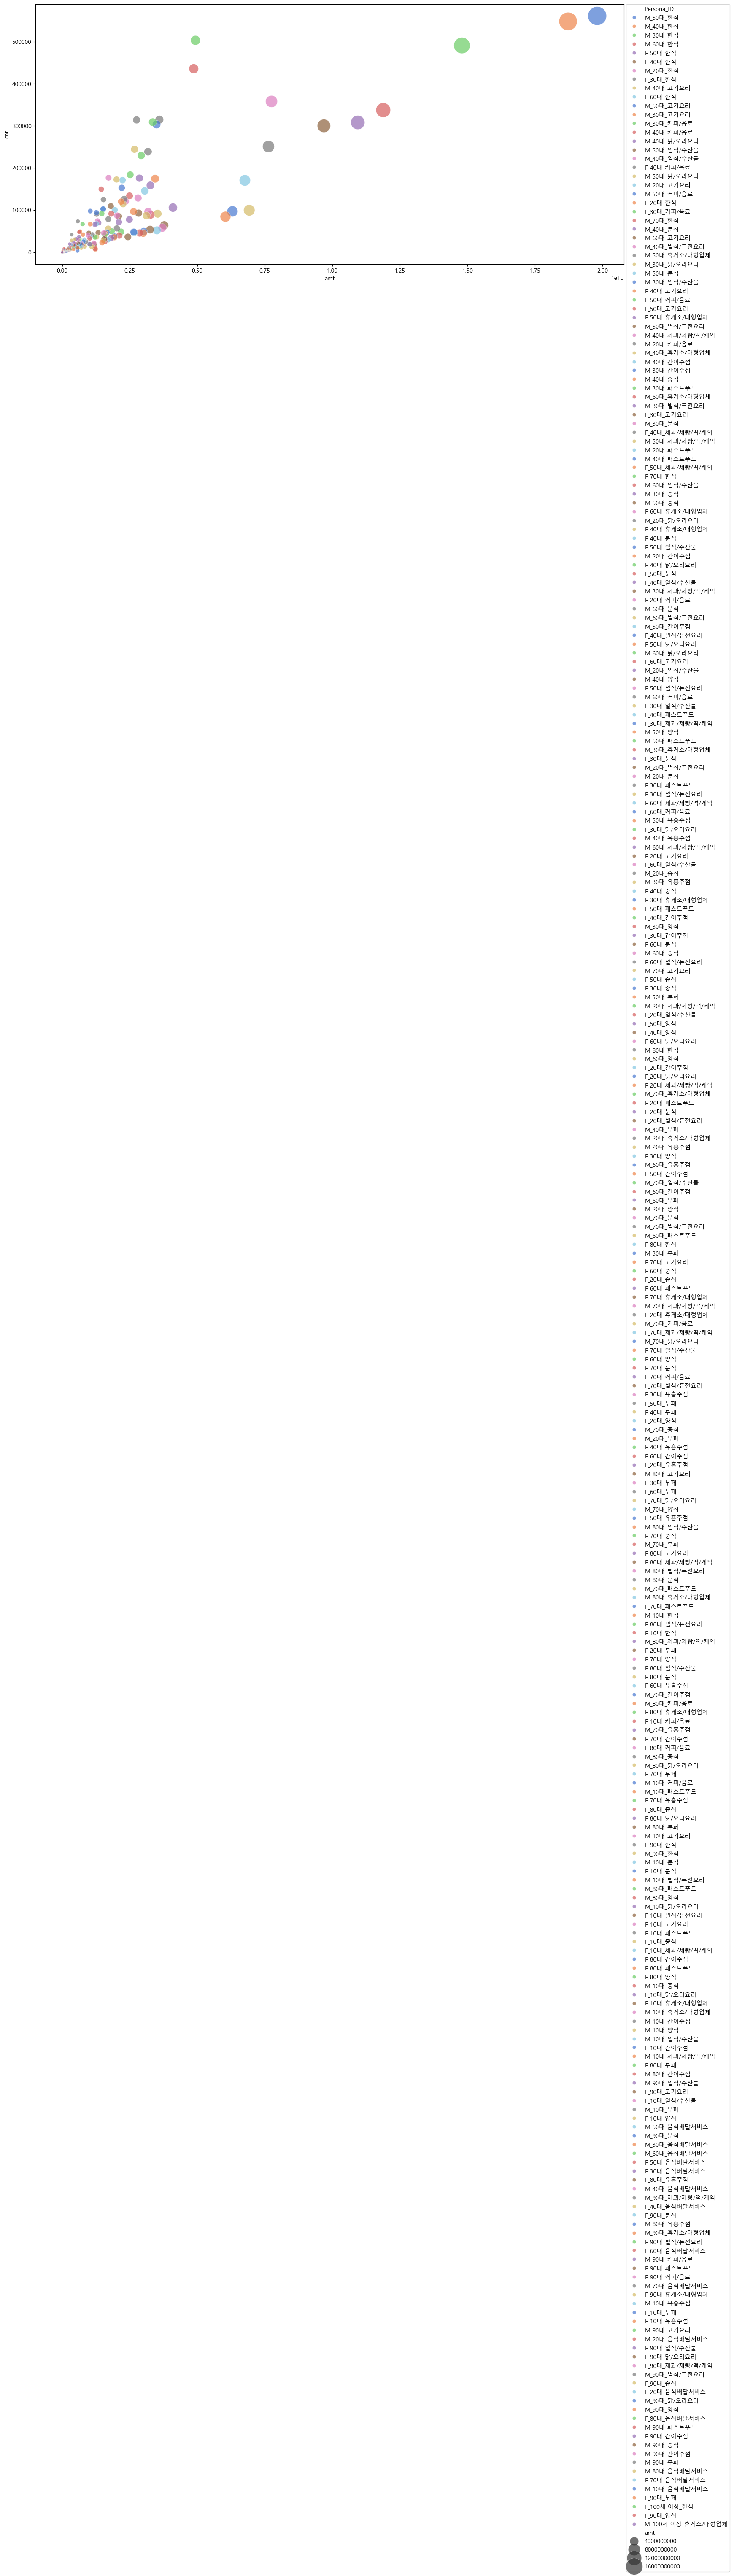

In [11]:
## 버블차트 제작
bubble_df = food_df.groupby('Persona_ID')[['amt','cnt']].sum().sort_values(by=['amt','cnt'], ascending=False)

fig, ax = plt.subplots(figsize=(18,8))

sns.scatterplot(data= bubble_df, x='amt', y='cnt', size ='amt', hue='Persona_ID', sizes=(20,1000), alpha=0.7, palette='muted', ax=ax)
plt.legend(bbox_to_anchor=(1.18,1), loc='upper right', borderaxespad=0)

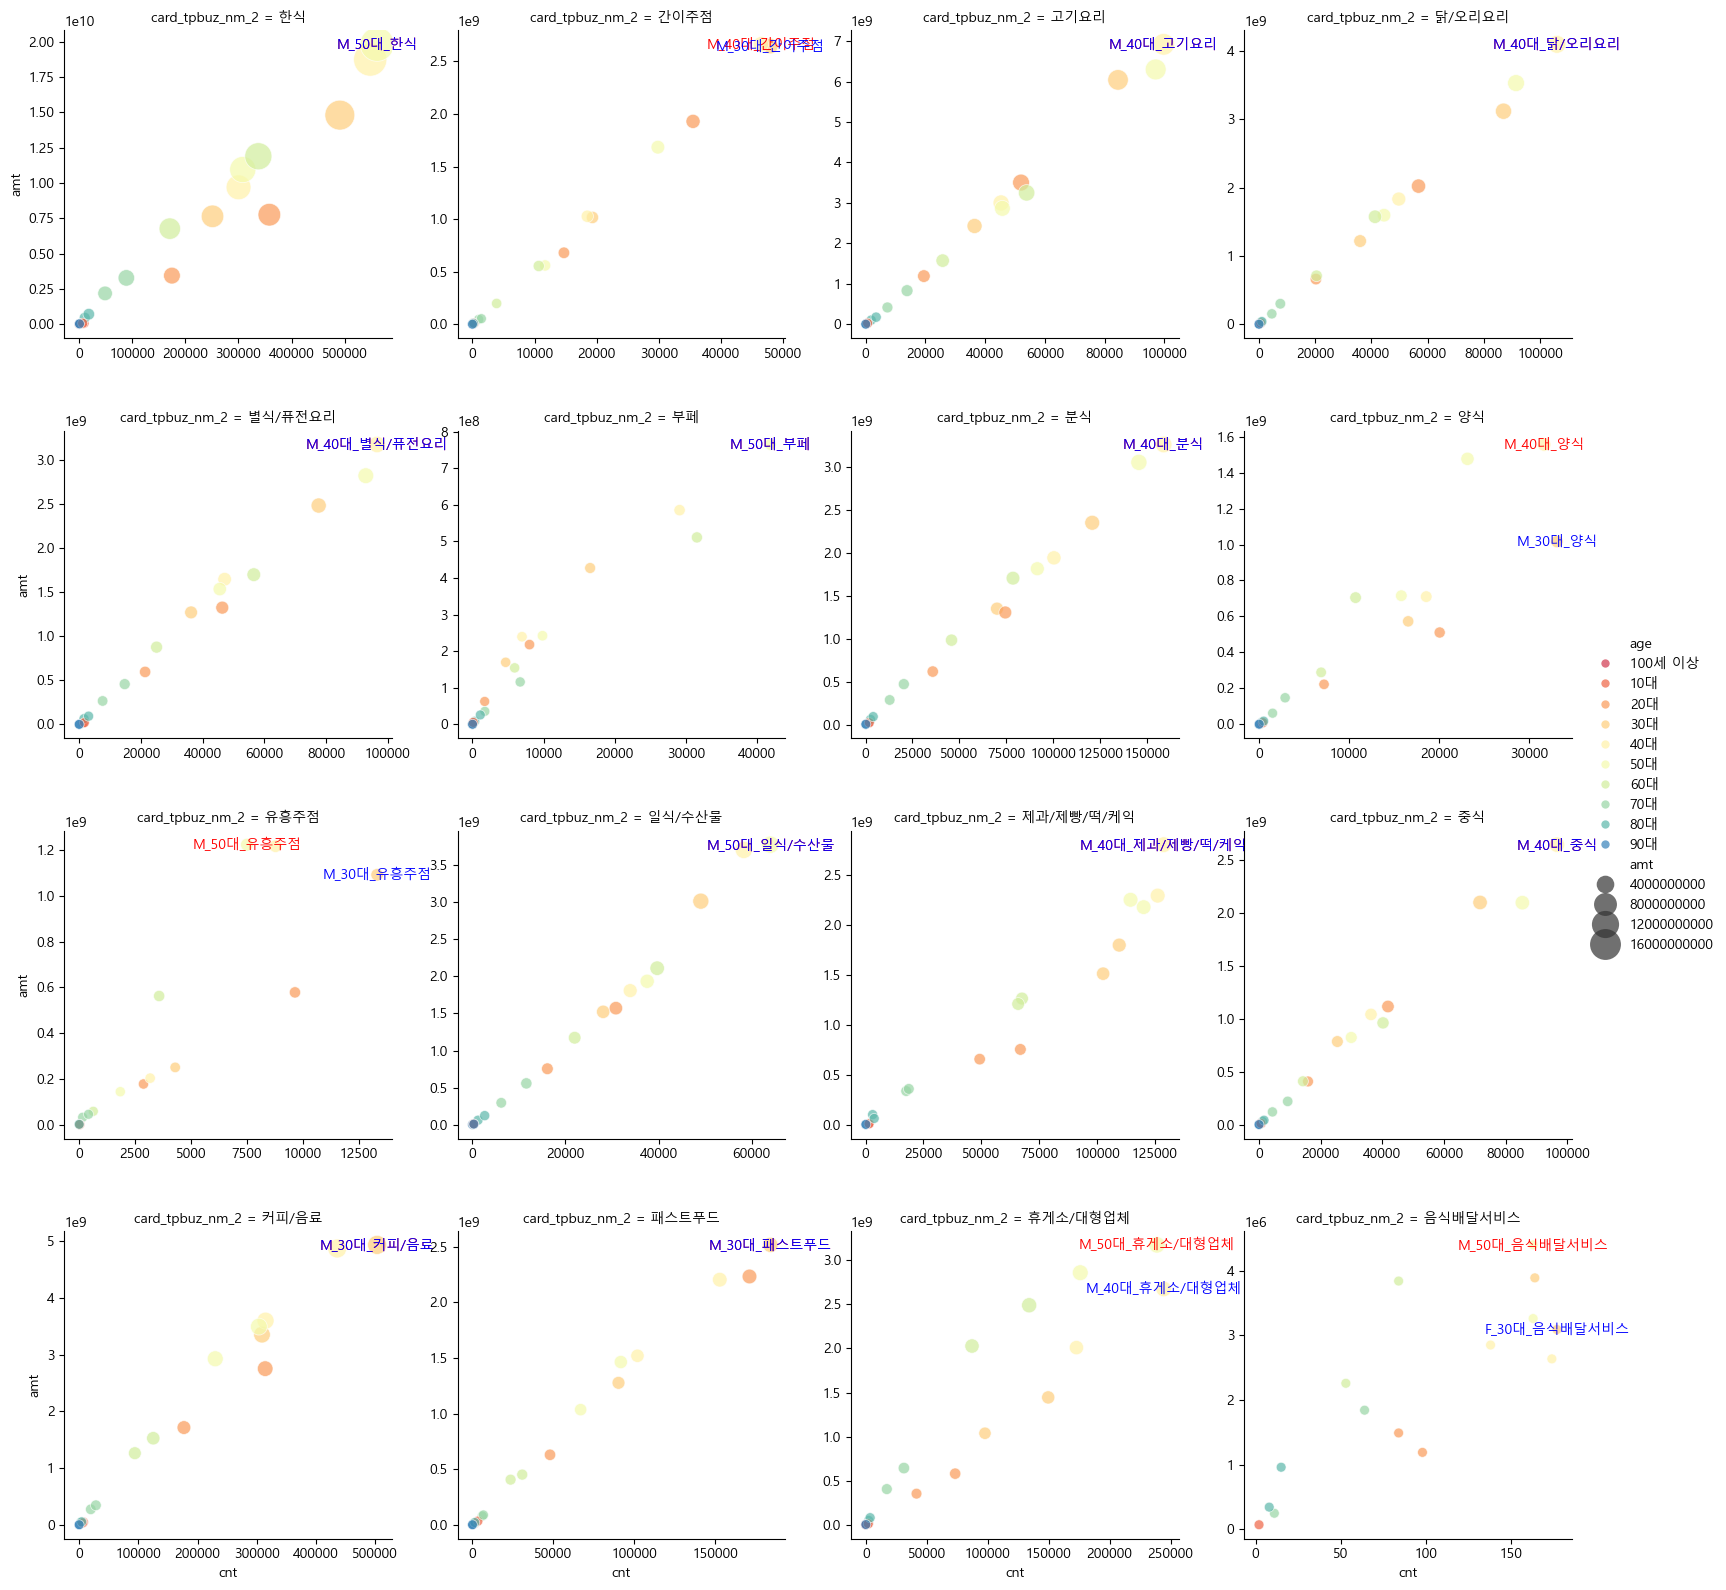

In [137]:
#소형 다중 차트
multi_df = food_df.groupby(by=['sex','age','card_tpbuz_nm_2', 'Persona_ID'], as_index=False)[['amt','cnt']].sum()

g = sns.relplot(data=multi_df, x='cnt', y='amt', col='card_tpbuz_nm_2', hue='age',
                 col_wrap=4, height=4, aspect=1, size='amt', sizes=(50, 600), alpha=0.7,
                   kind='scatter', palette='Spectral', facet_kws={'sharey':False,'sharex':False})

g.fig.subplots_adjust(hspace=0.3, wspace=0.2)

for name, ax in g.axes_dict.items():
    name_contain = multi_df[multi_df['card_tpbuz_nm_2'] == f"{name}"]

    if not name_contain.empty:
        amt_idx = name_contain['amt'].idxmax()
        origin_amt = multi_df.loc[amt_idx]
        ax.text(x=origin_amt['cnt'], y=origin_amt['amt'], s=f"{origin_amt['Persona_ID']}", color='red', ha ='center', va ='center')
    
    if origin_amt['amt'] != origin_amt['cnt']:
        cnt_idx = name_contain['cnt'].idxmax()
        origin_cnt = multi_df.loc[cnt_idx]
        ax.text(x=origin_cnt['cnt'], y= origin_cnt['amt'], s=f"{origin_cnt['Persona_ID']}", ha='center', va='center', color='Blue')


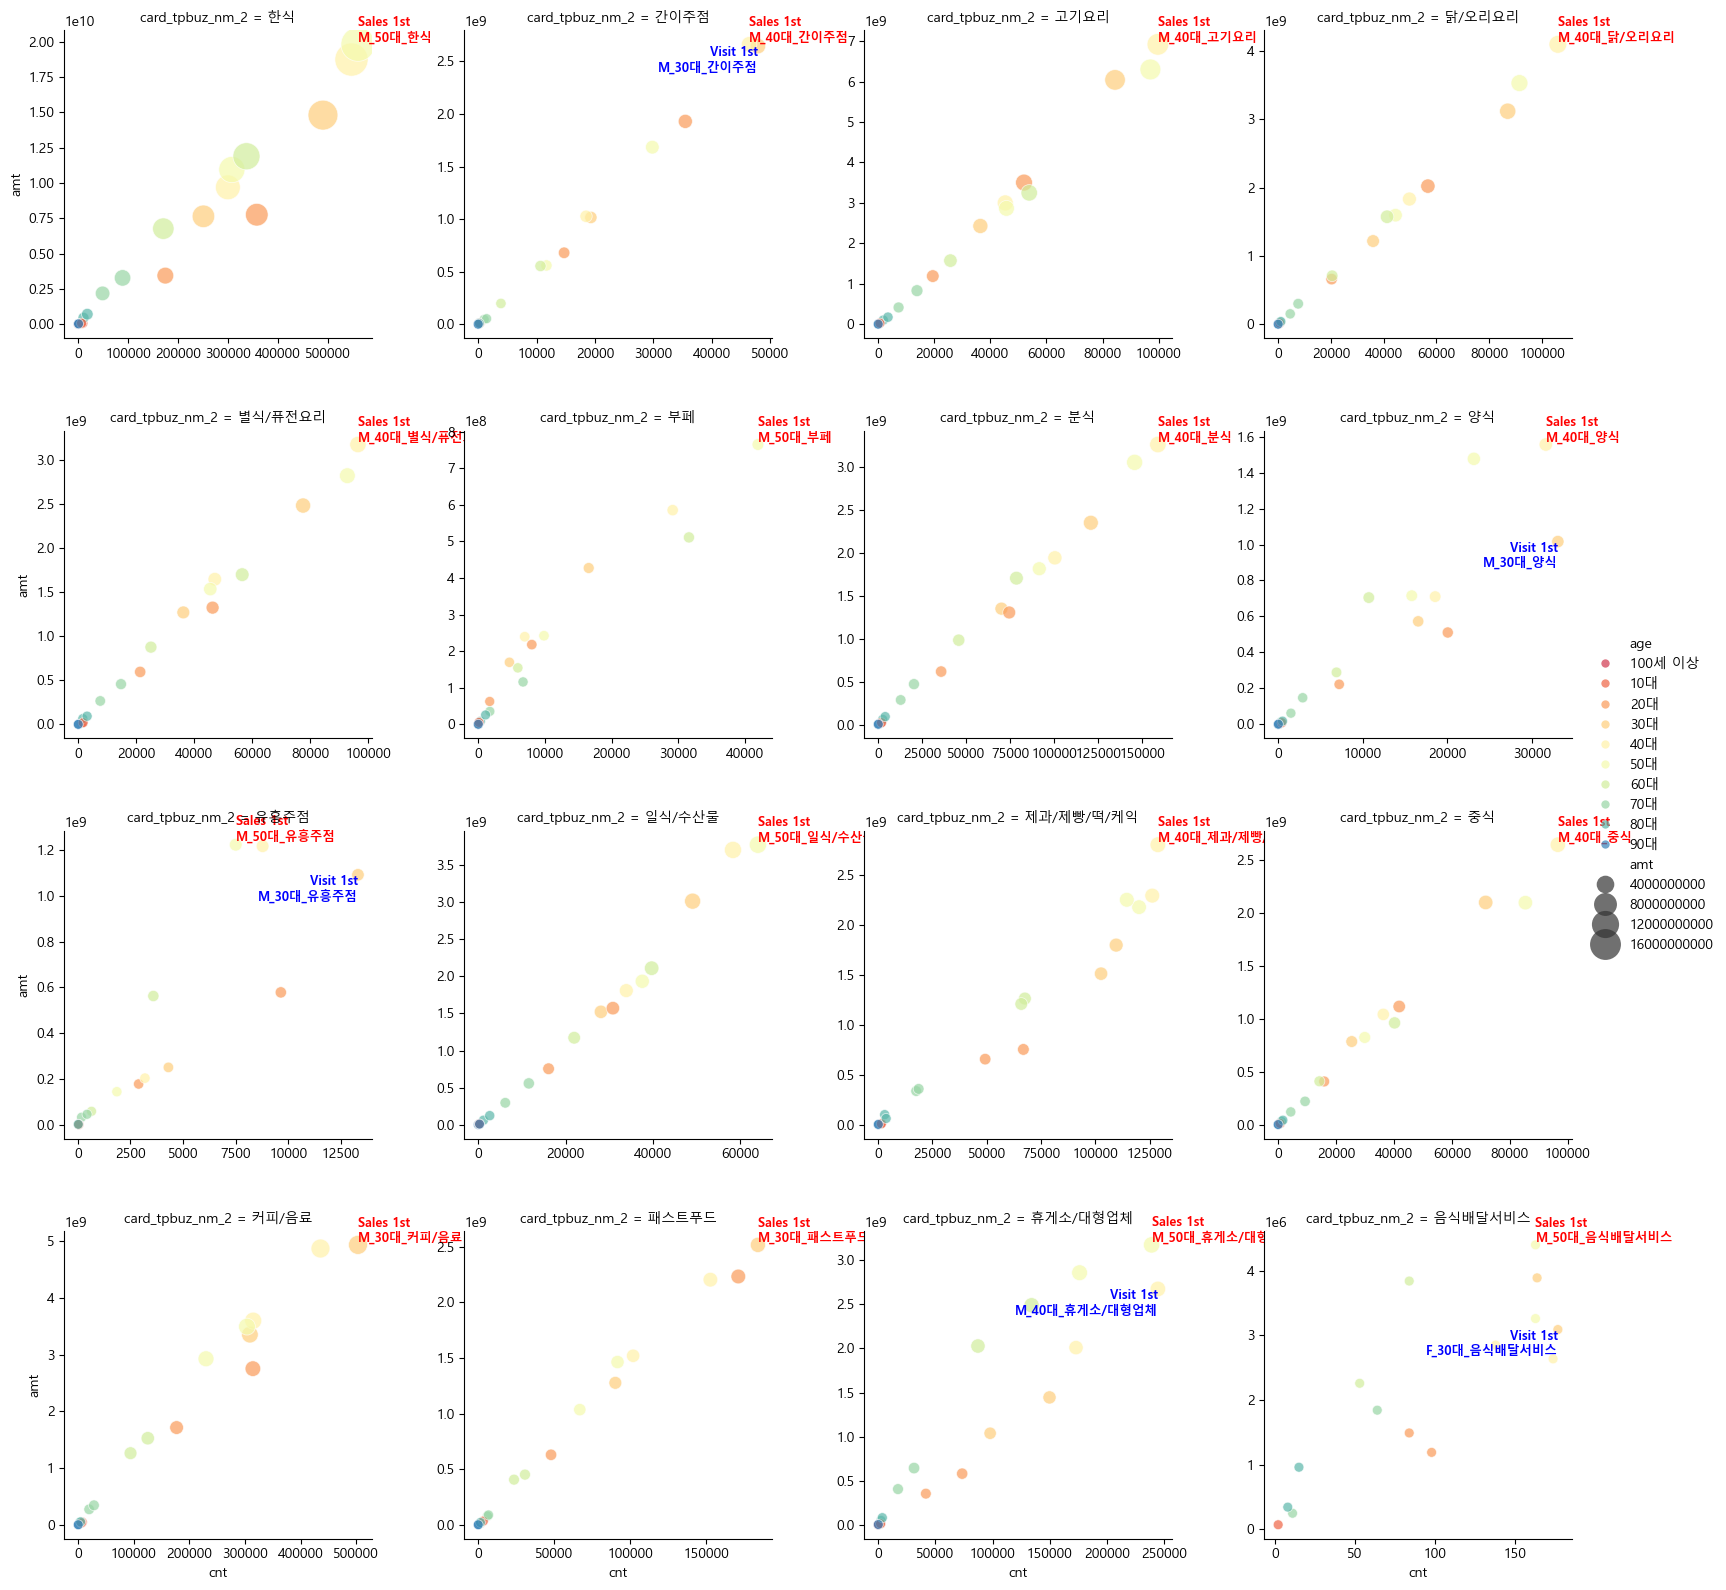

In [ ]:
#소형 다중 차트
multi_df = food_df.groupby(by=['sex','age','card_tpbuz_nm_2', 'Persona_ID'], as_index=False)[['amt','cnt']].sum()

g = sns.relplot(data=multi_df, x='cnt' ,y='amt', col='card_tpbuz_nm_2', hue='age',
            size='amt', sizes=(50,600), alpha=0.7, facet_kws={'sharey':False, 'sharex':False}, palette='Spectral',
            kind='scatter', col_wrap=4, height=4, aspect=1)

g.fig.subplots_adjust(wspace=0.2, hspace=0.3)

#시각화가 안좋으니 얘한테서는 최대값인 라벨만 가져오기
for name, ax in g.axes_dict.items():
    name_contain = multi_df[multi_df['card_tpbuz_nm_2'] == f"{name}"]

    if not name_contain.empty:
          amt_max_index = name_contain['amt'].idxmax()
          amt_max = multi_df.loc[amt_max_index]
          #amt 최고봉
          ax.text(x=cnt_max, y=amt_max, s=amt_max['Persona_ID'], color='red', ha='center', va='center')
    
    if amt_max_index != cnt_max_index:
         
         ax.text(x=cnt_max,y=amt_max,s=cnt_max['Persona_ID'], color='blue', ha='center', va='center')
         
    

<Axes: xlabel='cnt', ylabel='amt'>

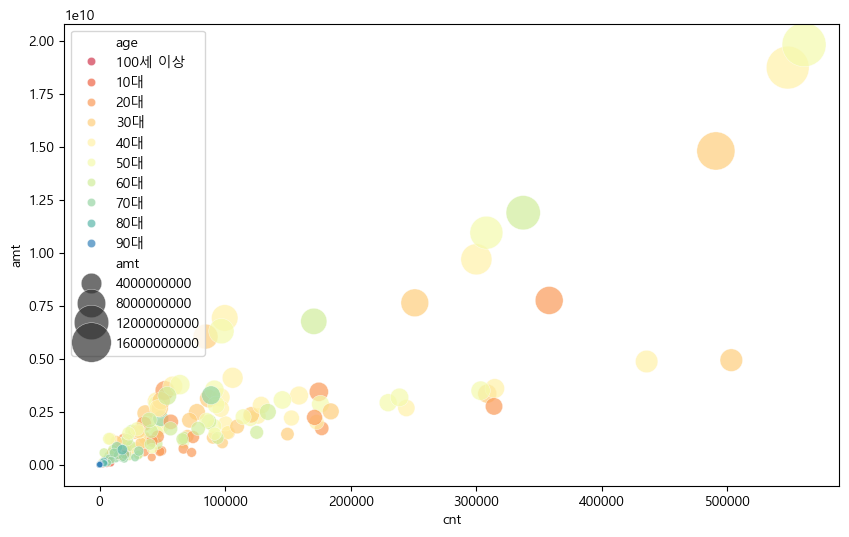

In [13]:
## 버블차트 다시 제작(새로 파싱)
bubble_df = food_df.groupby(by=['sex','age','card_tpbuz_nm_2'], as_index=False)[['amt','cnt']].sum()
 
sns.scatterplot(data=bubble_df, x='cnt', y='amt',size='amt', hue='age',sizes=(20,1000), alpha=0.7,palette='Spectral')